In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("../data/raw/healthcare-dataset-stroke-data.csv")

In [4]:
df.sample(5)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
598,31090,Male,15.0,0,0,No,children,Rural,205.50,24.2,never smoked,0
1114,29380,Female,42.0,1,0,Yes,Private,Rural,89.96,35.6,never smoked,0
3011,55459,Female,60.0,0,0,No,Private,Rural,91.82,28.3,formerly smoked,0
2106,65336,Female,27.0,0,0,Yes,Private,Urban,98.71,26.1,formerly smoked,0
1172,30411,Female,40.0,0,0,No,Private,Rural,117.45,30.7,smokes,0


In [5]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   str    
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   str    
 6   work_type          5110 non-null   str    
 7   Residence_type     5110 non-null   str    
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   str    
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), str(5)
memory usage: 479.2 KB


In [6]:
df.dropna(inplace=True)
df.info()

<class 'pandas.DataFrame'>
Index: 4909 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 4909 non-null   int64  
 1   gender             4909 non-null   str    
 2   age                4909 non-null   float64
 3   hypertension       4909 non-null   int64  
 4   heart_disease      4909 non-null   int64  
 5   ever_married       4909 non-null   str    
 6   work_type          4909 non-null   str    
 7   Residence_type     4909 non-null   str    
 8   avg_glucose_level  4909 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     4909 non-null   str    
 11  stroke             4909 non-null   int64  
dtypes: float64(3), int64(4), str(5)
memory usage: 498.6 KB


In [7]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000
mean,37064.313506,42.865374,0.091872,0.049501,105.305150,28.893237,0.042575
std,20995.098457,22.555115,0.288875,0.216934,44.424341,7.854067,0.201917
min,77.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,18605.000000,25.000000,0.000000,0.000000,77.070000,23.500000,0.000000
50%,37608.000000,44.000000,0.000000,0.000000,91.680000,28.100000,0.000000
75%,55220.000000,60.000000,0.000000,0.000000,113.570000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [8]:
df.duplicated().sum()

np.int64(0)

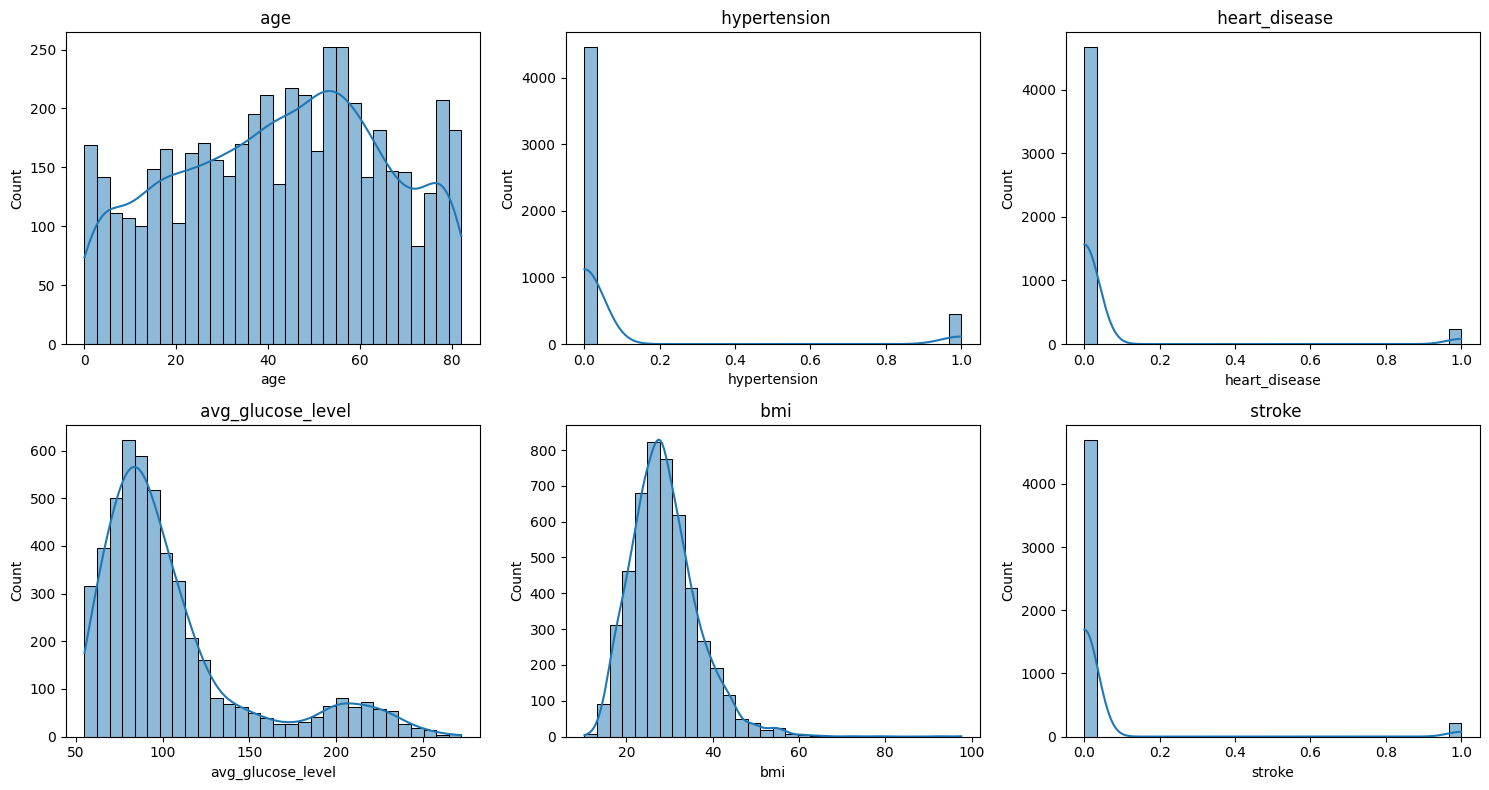

In [22]:
import math
def plot_all_hist(df,title_prefix = ""):
    num_cols= df.select_dtypes(include=[np.number]).columns
    n_cols = 3
    n_rows = math.ceil(len(num_cols)/n_cols)
    plt.figure(figsize=(5*n_cols,4*n_rows))

    for i, col in enumerate(num_cols,1):
        plt.subplot(n_rows,n_cols,i)
        sns.histplot(df[col],kde=True,bins=30)
        plt.title(f"{title_prefix} {col}")
    plt.tight_layout()
    plt.show()
plot_all_hist(df)

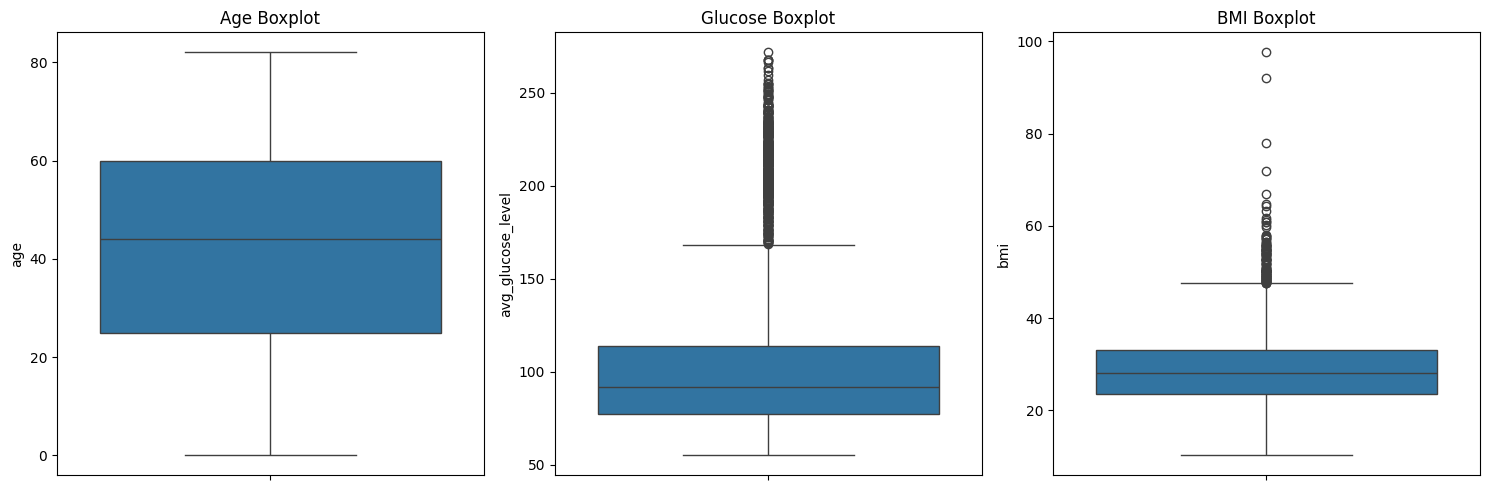

In [18]:
#outlier detection for continuous variables
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
sns.boxplot(y=df['age'], ax=axes[0]).set_title('Age Boxplot')
sns.boxplot(y=df['avg_glucose_level'], ax=axes[1]).set_title('Glucose Boxplot')
sns.boxplot(y=df['bmi'], ax=axes[2]).set_title('BMI Boxplot')
plt.tight_layout()

Text(0.5, 1.0, 'Stroke by Smoking Status')

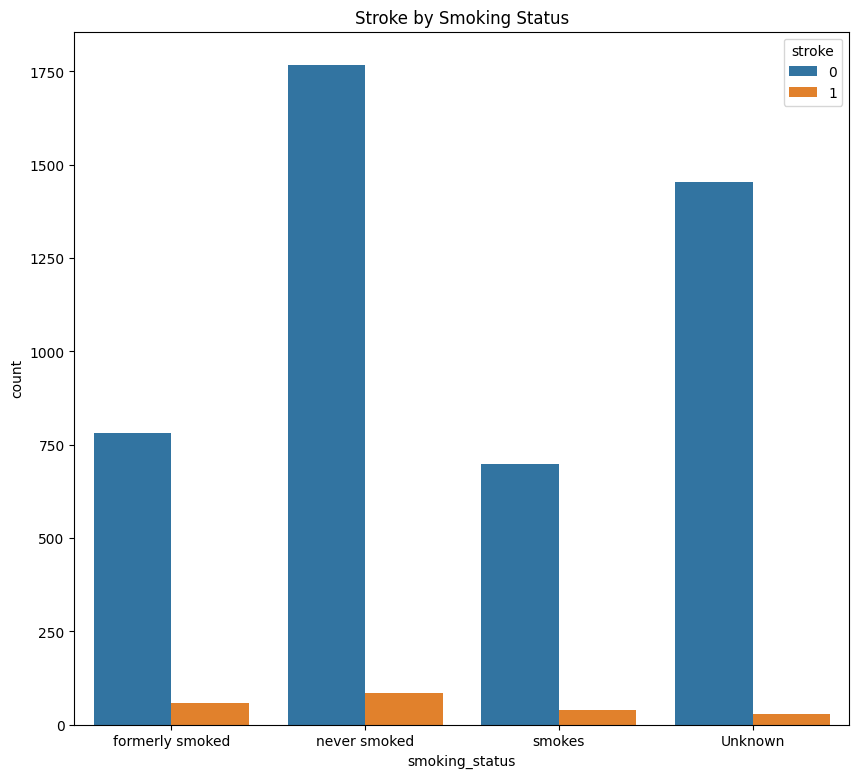

In [11]:
#graph plotting smoking status to stroke
plt.figure(figsize=(10,9))
sns.countplot(data=df, x="smoking_status", hue="stroke").set_title("Stroke by Smoking Status")

Text(0.5, 1.0, 'Stroke by Gender')

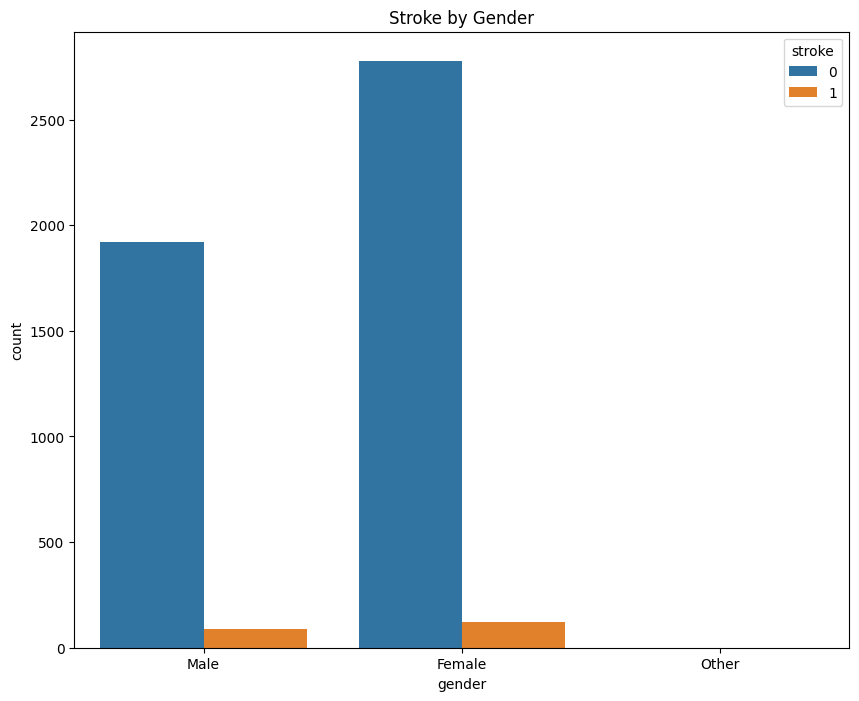

In [15]:
#graph plotting gender to stroke
plt.figure(figsize=(10,8))
sns.countplot(data=df, x="gender", hue="stroke").set_title("Stroke by Gender")

In [14]:
#dropping id column
df.drop(columns=["id"], inplace=True)
df.head(1)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1


Text(0.5, 1.0, 'Correlation Heatmap')

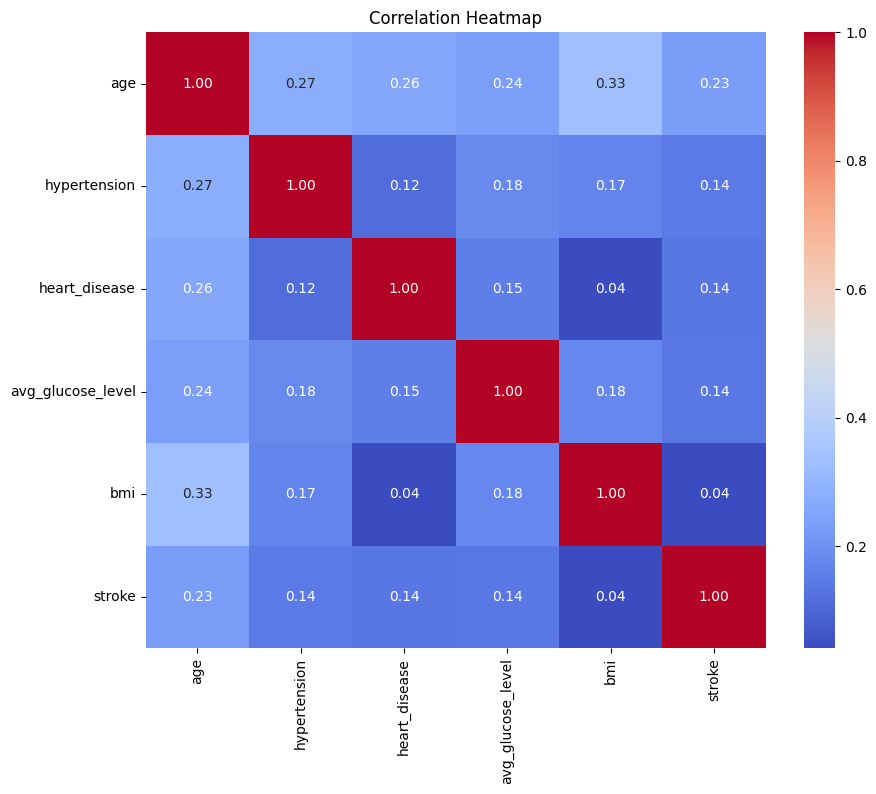

In [17]:
#plotting a correlation map
plt.figure(figsize=(10, 8))
correlation_matrix = df.corr(numeric_only=True)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')

In [21]:
#distribution of target variable "stroke"
stroke_count = df["stroke"].value_counts()
stroke_perc = df["stroke"].value_counts(normalize=True) * 100
print(stroke_count)
print(stroke_perc)

stroke
0    4700
1     209
Name: count, dtype: int64
stroke
0    95.742514
1     4.257486
Name: proportion, dtype: float64


In [25]:
df.to_csv("../data/processed/processed_file.csv", index=False)